In [27]:
import pandas as pd
import numpy as np 

from google.colab import files
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [28]:
# load dataset : Search Trends
url_1 = 'https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/search_trends_symptoms_dataset/United%20States%20of%20America/2020_US_weekly_symptoms_dataset.csv'
data1 = pd.read_csv(url_1, index_col=0,parse_dates=[0])

# Find the columns where each value is null
empty_cols = [col for col in data1.columns if data1[col].isnull().all()]

# Drop these columns from the dataframe
data1.drop(empty_cols, axis=1, inplace=True)

In [17]:
# load dataset : COVID hospitalization cases dataset
url_2 = 'https://raw.githubusercontent.com/google-research/open-covid-19-data/master/data/exports/cc_by/aggregated_cc_by.csv'
data2 = pd.read_csv(url_2, index_col=0,parse_dates=[0])

# form new data form with only 'date' and 'hospitalized_new' columns
new_data2 = data2[['date', 'hospitalized_new']]

# clean the row with NaN 'hospitalized_new'
new_data2 = new_data2.dropna(thresh=2)

new_data2['date'] = new_data2 ['date'].astype('datetime64[ns]')
new_data2 = new_data2.groupby("open_covid_region_code").resample('W-MON', label='right', closed = 'right', on='date').sum().reset_index()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
# Task1 merge datasets
data1['date'] = data1['date'].astype('datetime64[ns]')
#data1.dtypes

mergeData = pd.merge(data1, new_data2, how='left', on=['date','open_covid_region_code'])
mergeData = mergeData.dropna(thresh=int(mergeData.shape[0] * .30), axis=1)
mergeData.fillna(0, inplace=True)

# most common symptom: Aphonia(0.7), Crackles, Dysautonomia, Ventricular fibrillation (0.69)
mergeData.to_csv('merged_data.csv') 

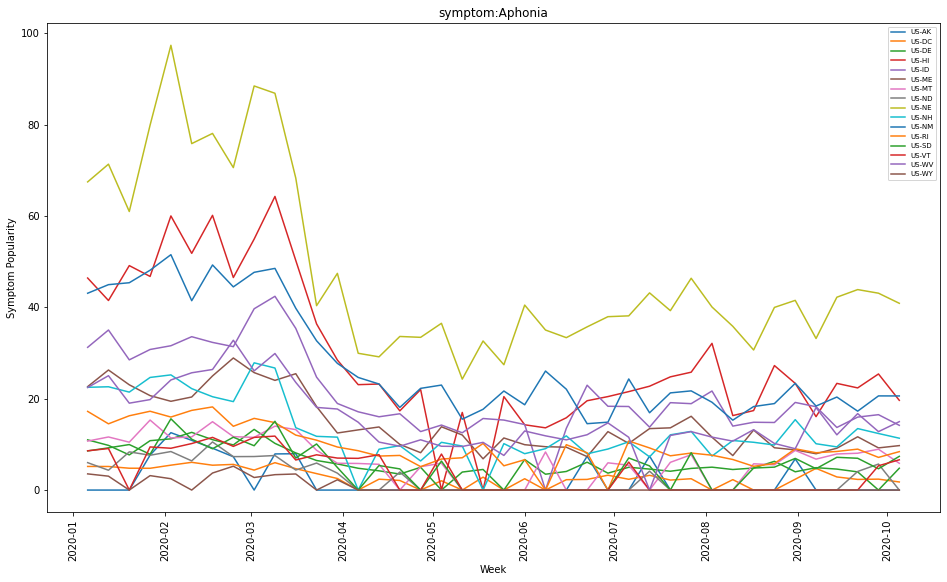

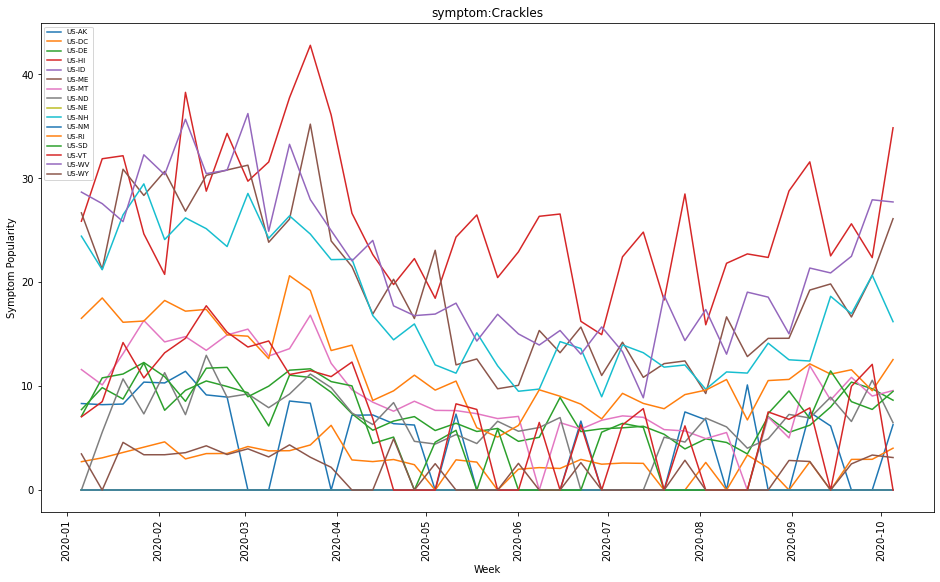

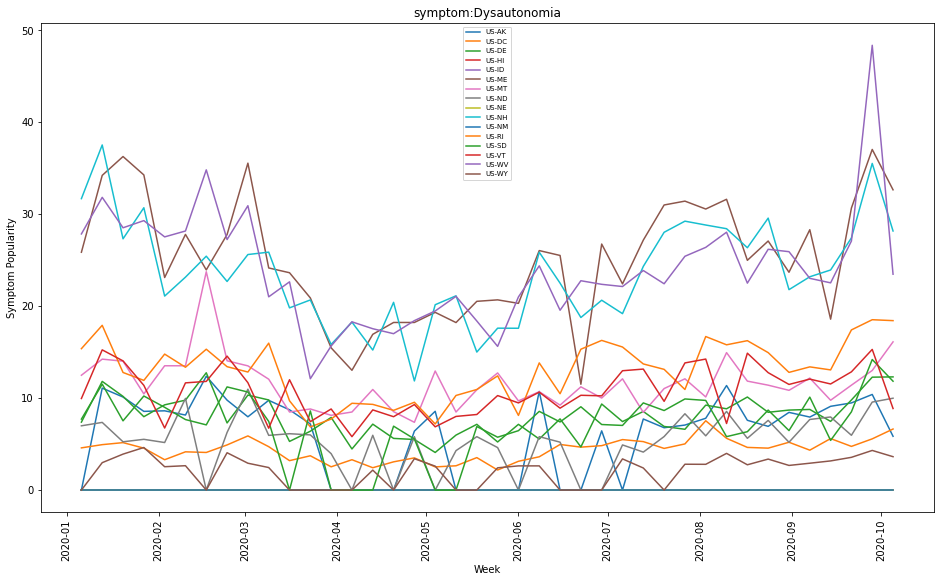

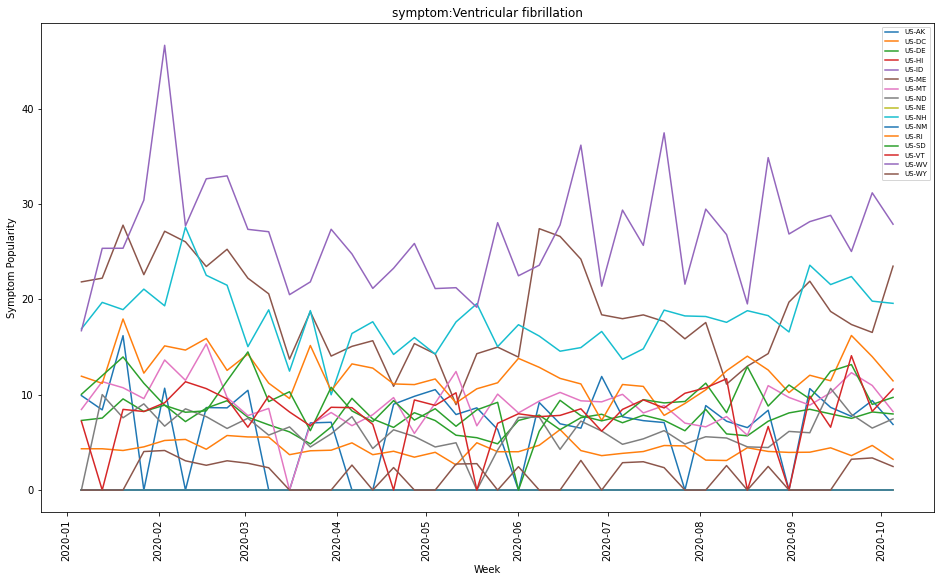

In [19]:
# Task2.1 visualization 

# a function which take a symptom as input and return the plot related to that symptom
def visualization(symptom):
    # extract out each region as a single dataset
    ak = mergeData[mergeData.open_covid_region_code == 'US-AK']
    dc = mergeData[mergeData.open_covid_region_code == 'US-DC']
    de = mergeData[mergeData.open_covid_region_code == 'US-DE']
    hi = mergeData[mergeData.open_covid_region_code == 'US-HI']
    id = mergeData[mergeData.open_covid_region_code == 'US-ID']
    me = mergeData[mergeData.open_covid_region_code == 'US-ME']
    mt = mergeData[mergeData.open_covid_region_code == 'US-MT']
    nd = mergeData[mergeData.open_covid_region_code == 'US-ND']
    ne = mergeData[mergeData.open_covid_region_code == 'US-NE']
    nh = mergeData[mergeData.open_covid_region_code == 'US-NH']
    nm = mergeData[mergeData.open_covid_region_code == 'US-NM']
    ri = mergeData[mergeData.open_covid_region_code == 'US-RI']
    sd = mergeData[mergeData.open_covid_region_code == 'US-SD']
    vt = mergeData[mergeData.open_covid_region_code == 'US-VT']
    wv = mergeData[mergeData.open_covid_region_code == 'US-WV']
    wy = mergeData[mergeData.open_covid_region_code == 'US-WY']

    # create 16 plots (they will be put together)
    plt.figure(figsize=(16,9))
    plot1, = plt.plot(ak.date, ak[symptom])
    plot2, = plt.plot(dc.date, dc[symptom]) 
    plot3, = plt.plot(de.date, de[symptom])
    plot4, = plt.plot(hi.date, hi[symptom])
    plot5, = plt.plot(id.date, id[symptom])
    plot6, = plt.plot(me.date, me[symptom])
    plot7, = plt.plot(mt.date, mt[symptom])
    plot8, = plt.plot(nd.date, nd[symptom])
    plot9, = plt.plot(ne.date, ne[symptom])
    plot10, = plt.plot(nh.date, nh[symptom])
    plot11, = plt.plot(nm.date, nm[symptom])
    plot12, = plt.plot(ri.date, ri[symptom])
    plot13, = plt.plot(sd.date, sd[symptom])
    plot14, = plt.plot(vt.date, vt[symptom])
    plot15, = plt.plot(wv.date, wv[symptom])
    plot16, = plt.plot(wy.date, wy[symptom])
    
    plt.title(symptom)
    plt.xlabel('Week')
    plt.ylabel('Symptom Popularity')
    plt.legend([plot1,plot2,plot3,plot4,plot5,plot6,plot7,plot8,plot9,plot10,plot11,plot12,plot13,plot14,plot15,plot16],
               ['US-AK','US-DC','US-DE','US-HI','US-ID','US-ME','US-MT','US-ND','US-NE','US-NH','US-NM','US-RI','US-SD','US-VT','US-WV','US-WY'],
               fontsize = 'x-small')
    plt.xticks(rotation=90)
    plt.show()

# plot four of the most popular symptom
visualization('symptom:Aphonia')
visualization('symptom:Crackles')
visualization('symptom:Dysautonomia')
visualization('symptom:Ventricular fibrillation')

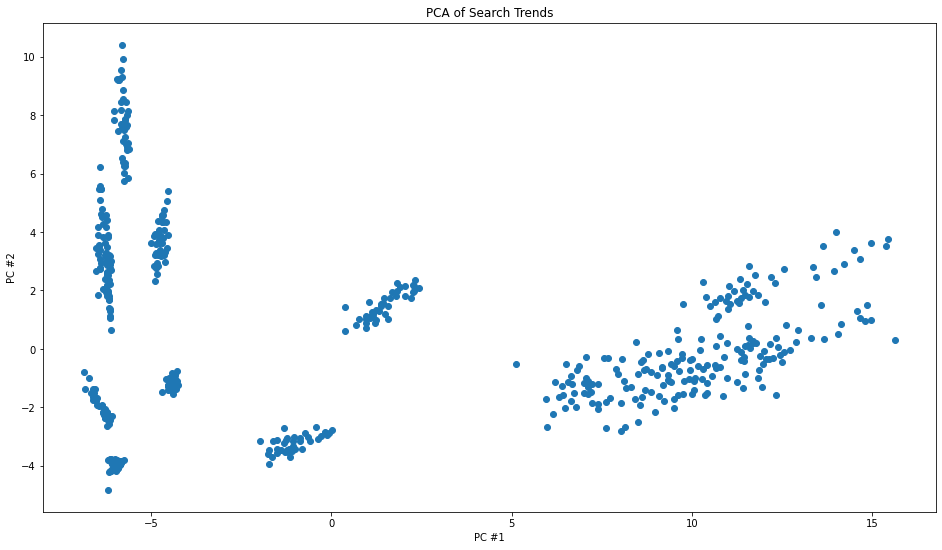

In [ ]:
# Task2.2 Reduce the data by PCA

cleandedData = mergeData.iloc[:, 6:97]
dataArray = cleandedData.to_numpy()
scaled_data = preprocessing.scale(dataArray)

pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

plt.figure(figsize=(16,9))
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.title('PCA of Search Trends')
plt.xlabel('PC #1')
plt.ylabel('PC #2')
plt.show()


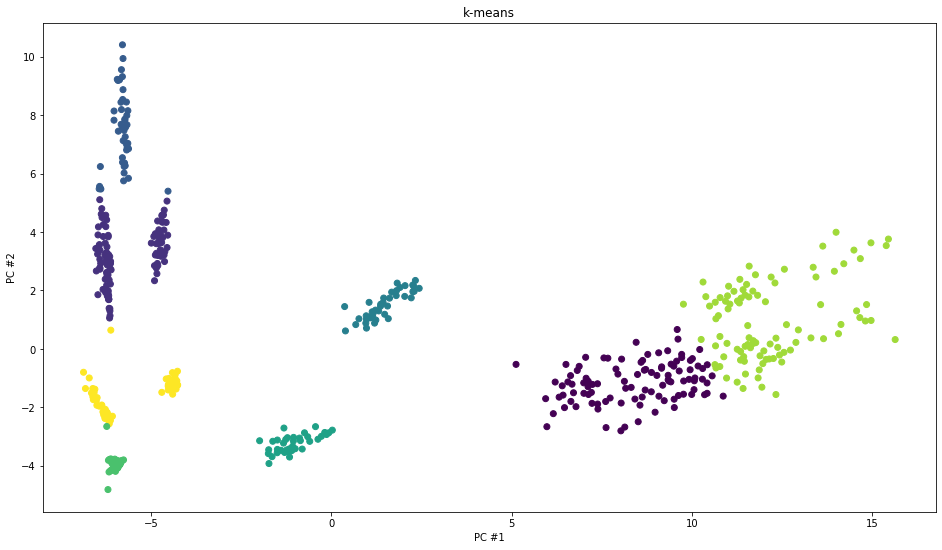

In [ ]:
# part 2.3 k-means clustering
from sklearn.cluster import KMeans
kmeans_low = KMeans(random_state=0)
kmeans_low.fit(pca_data)
pred = kmeans_low.predict((pca_data))


plt.figure(figsize=(16,9))
plt.scatter(pca_data[:,0], pca_data[:,1], c=pred)
plt.title('k-means')
plt.xlabel('PC #1')
plt.ylabel('PC #2')
plt.show()

In [ ]:
for column in mergeData.iloc[:, 6:96]:
  mergeData[column] = mergeData[column] - mergeData[column].median()

In [21]:
# part 3.1
from sklearn.model_selection import train_test_split
import numpy as np 

X_region = np.array(mergeData.iloc[:, 6:96])
Y_region = np.array(mergeData['hospitalized_new'])

# resort as date
mergeData_date = mergeData.sort_values(by="date") 
X_date = np.array(mergeData_date.iloc[:, 6:96])
Y_date = np.array(mergeData_date['hospitalized_new'])

X_date_train, X_date_test, Y_date_train, Y_date_test = train_test_split(X_date, Y_date, train_size = 0.8, shuffle = False)

Validation errors based on region:  [30.0, 20.0, 18.0, 19.0, 17.0, 17.0, 16.0, 15.0, 14.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 14.0, 14.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0]
Validation errors based on date:  [31.0, 32.0, 35.0, 36.0, 36.0, 36.0, 36.0, 37.0, 36.0, 36.0, 36.0, 37.0, 37.0, 38.0, 38.0, 38.0, 39.0, 39.0, 39.0, 39.0, 40.0, 39.0, 39.0, 39.0, 40.0, 40.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 41.0, 41.0, 41.0, 41.0, 42.0, 42.0, 42.0]


Text(0, 0.5, 'Mean Error')

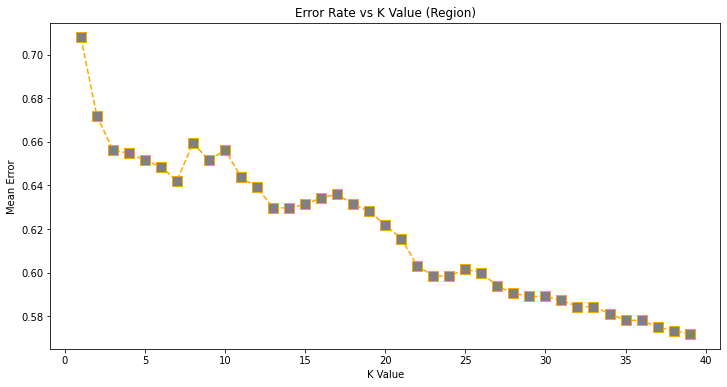

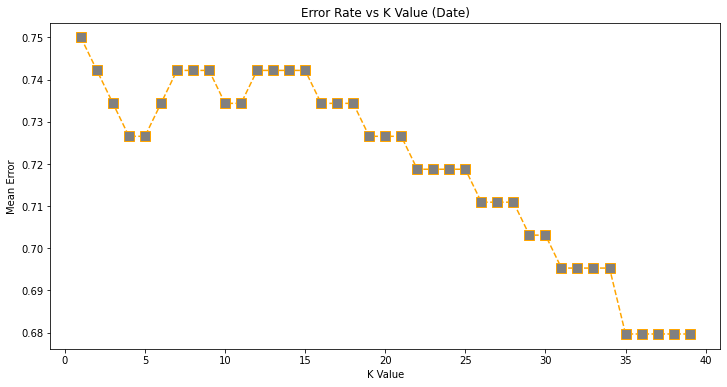

In [23]:
# 3.2 KNN (&region split)

kf = KFold(n_splits=5)
errors = []
for train_index, test_index in kf.split(X_region):
  error=[]
  validation_errors=[]
  X_region_train, X_region_test = X_region[train_index], X_region[test_index]
  Y_region_train, Y_region_test = Y_region[train_index], Y_region[test_index]
  for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_region_train, Y_region_train)
    knn_i_pred = knn.predict(X_region_test)
    error.append(np.mean(knn_i_pred != Y_region_test))
    validation_error = mean_absolute_error(knn_i_pred, Y_region_test)
    validation_errors.append(round(validation_error))
  errors.append(error)
errors = np.array(errors)
error_mean = errors.mean(axis=0)
print("Validation errors based on region: ", validation_errors)  
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_mean, color='orange', linestyle='dashed', marker='s', markerfacecolor='grey', markersize=10)
plt.title('Error Rate vs K Value (Region)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Based on date
error=[]
validation_errors=[]
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
  knn.fit(X_date_train, Y_date_train)
  knn_i_pred = knn.predict(X_date_test)
  error.append(np.mean(knn_i_pred != Y_date_test))
  validation_error = mean_absolute_error(knn_i_pred, Y_date_test)
  validation_errors.append(round(validation_error))
print("Validation errors based on date: ", validation_errors)  
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='orange', linestyle='dashed', marker='s', markerfacecolor='grey', markersize=10)
plt.title('Error Rate vs K Value (Date)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Validation errors based on region:  [29.416861692364172, 23.795899416720385, 25.528834623174667, 26.3030323385603, 24.545525850115762, 27.44129302897926, 27.256524367559525, 25.370763282041537, 24.2497225290194, 25.031473214285715, 23.308984374999998, 23.7099609375, 21.714936755952383, 23.610937500000002, 22.78515625, 22.1484375, 22.609375, 23.0625, 22.8828125, 23.5625, 23.828125, 23.96875, 22.8203125, 22.109375, 23.1796875, 22.5234375, 20.9765625, 23.5390625, 23.59375, 22.34375, 23.7265625, 21.7109375, 21.5859375, 22.9453125, 23.5546875, 23.328125, 23.1328125, 23.4765625, 23.015625]
Validation errors based on date:  [37.0, 29.0, 27.0, 27.0, 26.0, 26.0, 25.0, 28.0, 32.0, 30.0, 29.0, 31.0, 32.0, 31.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 33.0, 33.0, 31.0, 31.0, 31.0, 33.0, 34.0, 33.0, 30.0, 34.0, 34.0, 34.0, 33.0, 32.0, 33.0, 30.0, 32.0, 33.0, 33.0]


Text(0, 0.5, 'Mean Error')

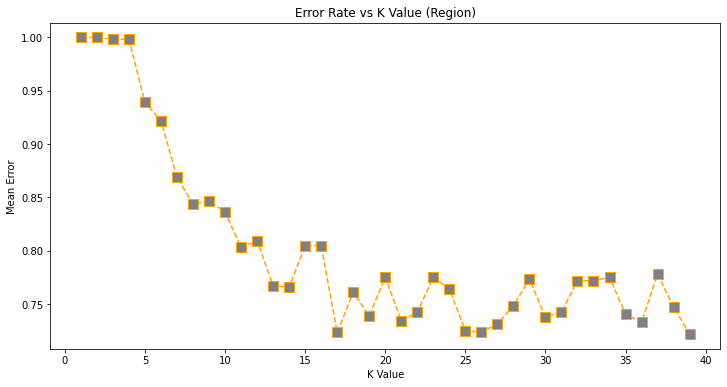

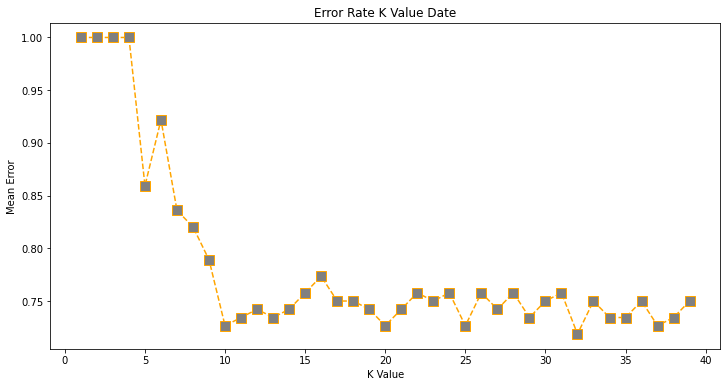

In [26]:
# 3.2 decision tree

kf = KFold(n_splits=5)
errors = []
for train_index, test_index in kf.split(X_region):
  error=[]
  validation_errors=[]
  X_region_train, X_region_test = X_region[train_index], X_region[test_index]
  Y_region_train, Y_region_test = Y_region[train_index], Y_region[test_index]
  for i in range(1, 40):
    dtree_reg = DecisionTreeRegressor(max_depth=i).fit(X_region_train, Y_region_train)
    dtree_pred = dtree_reg.predict(X_region_test)
    validation_error = mean_absolute_error(dtree_pred, Y_region_test)
    validation_errors.append(validation_error)
    error.append(np.mean(dtree_pred != Y_region_test))
  errors.append(error)
errors = np.array(errors)
error_mean = errors.mean(axis=0)
print("Validation errors based on region: ", validation_errors)  
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_mean, color='orange', linestyle='dashed', marker='s', markerfacecolor='grey', markersize=10)
plt.title('Error Rate vs K Value (Region)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Dtree Based on date
error=[]
validation_errors=[]
for i in range(1, 40):
  dtree_reg = DecisionTreeRegressor(max_depth=i).fit(X_date_train, Y_date_train)
  dtree_pred = dtree_reg.predict(X_date_test)
  error.append(np.mean(dtree_pred != Y_date_test))
  validation_error = mean_absolute_error(dtree_pred, Y_date_test)
  validation_errors.append(round(validation_error))
print("Validation errors based on date: ", validation_errors)  
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='orange', linestyle='dashed', marker='s', markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value Date')
plt.xlabel('K Value')
plt.ylabel('Mean Error')